## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [ ]:
pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [ ]:
# Ваш код здесь
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


Из общей информации Xtrain следует:

DataFrame содержит 7500 записей (от индекса 0 до 7499)

Всего 15 колонок

Нулевые значения отсуствуют

Пропущенные значения присуствуют в столбиках f2, f7, f11

In [ ]:
duplicate_Xtrain = Xtrain[Xtrain.duplicated()]
print("number of duplicate rows: ", duplicate_Xtrain.shape)

number of duplicate rows:  (0, 15)


In [ ]:
# Проверка на NaN значения
Xtrain.isnull().any().any()

True

In [ ]:
# Проверка на нулевые значения
Xtrain.isnull().sum()

,0
f1,0
f2,75
f3,0
f4,0
f5,0
f6,0
f7,1875
f8,0
f9,0
f10,0


В DataFrame присуствуют нулевые значения, для начала их нужно обработать и заполниить NaN средними значениями

In [ ]:
# создаём новый DataFrame
median_Xtrain = pd.DataFrame(Xtrain)

# Заполнение NaN медианами соответствующих столбцов
fix_Xtrain = median_Xtrain.fillna(median_Xtrain.median())

print("Исходный DataFrame:")
print(median_Xtrain)
print("\nDataFrame после заполнения медианами:")
print(fix_Xtrain)

Исходный DataFrame:
      f1          f2      f3        f4  f5        f6        f7        f8  \
0     50  218.593930  273536  0.104575   4  0.445026  0.274531  0.444334   
1     32  276.771005  173314  0.224684  11  0.445026  0.439103  0.444334   
2     38  218.593930   28887  0.032491   7  0.445026  0.274531  0.444334   
3     19  218.593930  427862  0.179322  10  0.049127  0.044987  0.009499   
4     44  218.593930  109339  0.032491   7  0.098837  0.115721  0.066581   
...   ..         ...     ...       ...  ..       ...       ...       ...   
7495  48  218.593930  329778  0.171817   9  0.066372       NaN  0.066581   
7496  25  218.593930  104439  0.179322  10  0.049127  0.131370  0.103024   
7497  50  218.593930  162632  0.171817   9  0.445026  0.482222  0.444334   
7498  51  276.771005  174824  0.171817   9  0.049127  0.093897  0.103024   
7499  29  263.691684  180916  0.179322  10  0.066390  0.131370  0.066581   

             f9       f10     f11  f12  f13       f14  target  
0  

In [ ]:
# Проверка на NaN значения
fix_Xtrain.isnull().any().any()

False

In [ ]:
# Проверка на нулевые значения
fix_Xtrain.isnull().sum()

,0
f1,0
f2,0
f3,0
f4,0
f5,0
f6,0
f7,0
f8,0
f9,0
f10,0


In [ ]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


DataFrame содержит 2500 записей (от индекса 0 до 2499)

Всего 15 колонок

Нулевые значения отсуствуют

Нет пропущеных записей в колонках

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

In [ ]:
# Ваш код здесь
# Подсчет экземпляров для целй переменной ainint('ain:'l_coin = fix_Xtra'target'].counts()
print('Xtrain:')
class_counts_Xtrain = fix_Xtrain['target'].value_counts()
print(class_counts_Xtrain)

Xtrain:
target
0    5708
1    1792
Name: count, dtype: int64


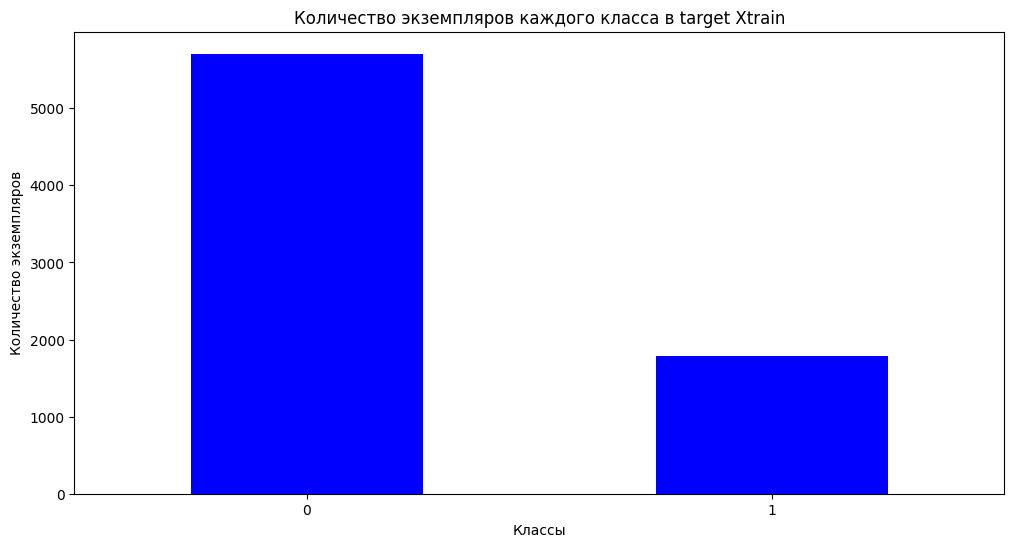

In [ ]:
# Размер графика
plt.figure(figsize=(12, 6))

# Построение графика
class_counts_Xtrain.plot(kind='bar', color='blue')

plt.title('Количество экземпляров каждого класса в target Xtrain')
plt.ylabel('Количество экземпляров')
plt.xlabel('Классы')

# Повернуть метки оси x
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Минимальное и максимальное количество экземпляров класса
min_class_count_Xtrain = class_counts_Xtrain.min()
max_class_count_Xtrain = class_counts_Xtrain.max()

# Рассчитайте коэффициент дисбаланса
imbalance_ratio_Xtrain = min_class_count_Xtrain / max_class_count_Xtrain

print(f'Минимальное количество экземпляров класса: {min_class_count_Xtrain}')
print(f'Максимальное количество экземпляров класса: {max_class_count_Xtrain}')
print(f'Коэффициент дисбаланса: {imbalance_ratio_Xtrain}')

Минимальное количество экземпляров класса: 1792
Максимальное количество экземпляров класса: 5708
Коэффициент дисбаланса: 0.31394533987386125


In [ ]:
# Подсчет экземпляров для целевой переменной Xtest
print('Xtest:')
# Подсчет экземпляров для целевой переменной
class_counts_Xtest = Xtest['target'].value_counts()
print(class_counts_Xtest)

Xtest:
target
0    1913
1     587
Name: count, dtype: int64


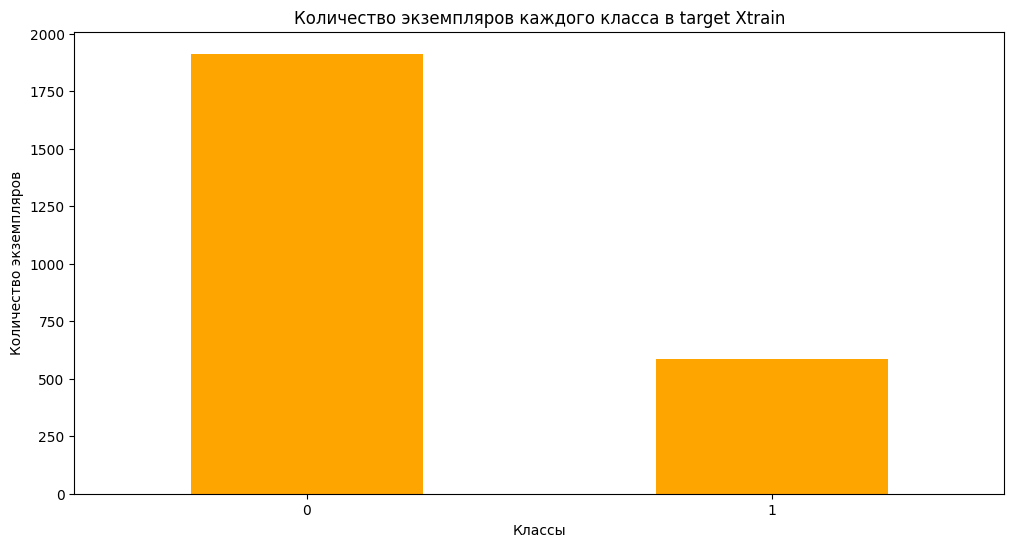

In [ ]:
# Размер графика
plt.figure(figsize=(12, 6))

# Построение графика
class_counts_Xtest.plot(kind='bar', color='orange')

plt.title('Количество экземпляров каждого класса в target Xtrain')
plt.ylabel('Количество экземпляров')
plt.xlabel('Классы')

# Повернуть метки оси x
plt.xticks(rotation=0)

# Показать график
plt.show()

In [ ]:
# Минимальное и максимальное количество экземпляров класса
min_class_count_Xtest = class_counts_Xtest.min()
max_class_count_Xtest = class_counts_Xtest.max()

# Рассчитайте коэффициент дисбаланса
imbalance_ratio_Xtest = min_class_count_Xtest / max_class_count_Xtest

print(f'Минимальное количество экземпляров класса: {min_class_count_Xtest}')
print(f'Максимальное количество экземпляров класса: {max_class_count_Xtest}')
print(f'Коэффициент дисбаланса: {imbalance_ratio_Xtest}')

Минимальное количество экземпляров класса: 587
Максимальное количество экземпляров класса: 1913
Коэффициент дисбаланса: 0.30684788290642967


### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [ ]:
from sklearn.metrics import f1_score

# Ваш код здесь
# Определение независимых и зависимых переменных
X = fix_Xtrain.drop(["target"], axis=1) # Независимые переменные
y = fix_Xtrain['target']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (6000, 14)
Размер тестового набора: (1500, 14)


In [ ]:
# Обучение модели Logistic Regression
logistic_model = LogisticRegression()

# Обучение модели на обучающей выборке
logistic_model.fit(X_train, y_train)

# Обучение модели SVC
svc_model = SVC()

# Обучение модели на обучающей выборке
svc_model.fit(X_train, y_train)

# Применение модели на тестовых данных
y_pred_logistic = logistic_model.predict(X_test)

# Применение модели на тестовых данных
y_pred_svc = svc_model.predict(X_test)

# Оценка моделей
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
svc_accuracy = accuracy_score(y_test, y_pred_svc)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("SVC Accuracy:", svc_accuracy)

# Вывод отчетов о классификации
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nSVC Classification Report:\n", classification_report(y_test, y_pred_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8046666666666666
SVC Accuracy: 0.782

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1158
           1       0.71      0.25      0.36       342

    accuracy                           0.80      1500
   macro avg       0.76      0.61      0.62      1500
weighted avg       0.79      0.80      0.77      1500


SVC Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1158
           1       0.94      0.05      0.09       342

    accuracy                           0.78      1500
   macro avg       0.86      0.52      0.48      1500
weighted avg       0.82      0.78      0.70      1500



Низкие показатели recall, f1 подтверждают дисбаланс классов который был обнаружен выше, что свидетельсвует о том, что результаты accuracu_score не  действительные. Требуется баланс классов.

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [ ]:
# Логистическая регрессия с balanced class weights

# Создание модели с учетом сбалансированных весов классов
logistic_model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Обучение модели
logistic_model_balanced.fit(X_train, y_train)

# Предсказания и оценка
y_pred_logistic_balanced = logistic_model_balanced.predict(X_test)
logistic_accuracy_balanced = accuracy_score(y_test, y_pred_logistic_balanced)

# Вывод отчета
print("Logistic Regression (class_weight='balanced') точность:", logistic_accuracy_balanced)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic_balanced))


Logistic Regression (class_weight='balanced') точность: 0.722

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1158
           1       0.43      0.67      0.52       342

    accuracy                           0.72      1500
   macro avg       0.66      0.70      0.66      1500
weighted avg       0.78      0.72      0.74      1500



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Модель SVC с balanced class weights.

# Настройка гиперпараметров для SVC с balanced class weights
svc_model_balanced = SVC(class_weight='balanced', random_state=42)

# Обучение модели
svc_model_balanced.fit(X_train, y_train)

# Предсказания и оценка
y_pred_svc_balanced = svc_model_balanced.predict(X_test)
svc_accuracy_balanced = accuracy_score(y_test, y_pred_svc_balanced)

# Вывод отчета
print("\nSVC (class_weight='balanced') точность:", svc_accuracy_balanced)
print("\nSVC Classification Report:\n", classification_report(y_test, y_pred_svc_balanced))



SVC (class_weight='balanced') точность: 0.7926666666666666

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1158
           1       0.94      0.10      0.18       342

    accuracy                           0.79      1500
   macro avg       0.87      0.55      0.53      1500
weighted avg       0.82      0.79      0.72      1500



In [ ]:
# Создание новых признаков
fix_Xtrain['f1_f2_interaction'] = fix_Xtrain['f1'] * fix_Xtrain['f2'] # Интеракция
fix_Xtrain['f3_log'] = np.log1p(fix_Xtrain['f3'])  # Логарифмирование
fix_Xtrain['f4_squared'] = fix_Xtrain['f4'] ** 2  # Квадрат

# Определение независимых и зависимых переменных
X = fix_Xtrain.drop(["target"], axis=1) # Независимые переменные
y = fix_Xtrain['target']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (6000, 17)
Размер тестового набора: (1500, 17)


In [ ]:
# Модель Logistic Regression с динамическими весами
class_weights_log_3 = {0: 1, 1: (len(y) / (2 * y.value_counts()[1]))}
logistic_model_3 = LogisticRegression(class_weight=class_weights_log_3, solver='liblinear', penalty='l1', C=0.1)

# Обучение модели на обучающей выборке
logistic_model_3.fit(X_train, y_train)

# Обучение модели SVC с RBF ядром
class_weights_svc_3 = {0: 1, 1: (len(y) / (2 * y.value_counts()[1]))}
svc_model_3 = SVC(class_weight='balanced', kernel='poly', degree=4, coef0=2, gamma='scale', C=1.0)

# Обучение модели на обучающей выборке
svc_model_3.fit(X_train, y_train)

# Применение модели на тестовых данных
y_pred_logistic_manual_3 = logistic_model_3.predict(X_test)

# Применение модели на тестовых данных
y_pred_svc_manual_3 = svc_model_3.predict(X_test)

# Оценка моделей
logistic_accuracy_manual_3 = accuracy_score(y_test, y_pred_logistic_manual_3)
svc_accuracy_manual_3 = accuracy_score(y_test, y_pred_svc_manual_3)

print("Logistic Regression точность:", logistic_accuracy_manual_3)
print("SVC точность:", svc_accuracy_manual_3)

# Вывод отчетов о классификации
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_logistic_manual_3))
print("\nSVC:\n", classification_report(y_test, y_pred_svc_manual_3))

Logistic Regression точность: 0.818
SVC точность: 0.7166666666666667

Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      1158
           1       0.58      0.75      0.65       342

    accuracy                           0.82      1500
   macro avg       0.75      0.80      0.77      1500
weighted avg       0.84      0.82      0.83      1500


SVC:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1158
           1       0.40      0.51      0.45       342

    accuracy                           0.72      1500
   macro avg       0.62      0.64      0.63      1500
weighted avg       0.74      0.72      0.73      1500



В третьем варианте удалось улучгить модель с Logistic Regression

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [ ]:
# Ваш код здесь
# Создание новых признаков
Xtest['f1_f2_interaction'] = Xtest['f1'] * Xtest['f2'] # Интеракция
Xtest['f3_log'] = np.log1p(Xtest['f3'])  # Логарифмирование
Xtest['f4_squared'] = Xtest['f4'] ** 2  # Квадрат

X_test_data = Xtest.drop(columns=['target'])  # замените 'target' на имя целевой переменной
y_test_data = Xtest['target']

# Применение модели на отложенной выборке Logistic Regression

# Обучение модели на обучающей выборке
test_logistic_model_3 = logistic_model_3.predict(X_test_data)

# Применение модели на отложенной выборке SVC
test_svc_model_3 = svc_model_3.predict(X_test_data)

# Вычисление метрики f1
f1_log = f1_score(y_test_data, test_logistic_model_3)
f1_svc = f1_score(y_test_data, test_svc_model_3)

print("Метрика f1 для Logistic Regression:", f1_log)
print("Метрика f1 для SVC:", f1_svc)

Метрика f1 для Logistic Regression: 0.5188374596340151
Метрика f1 для SVC: 0.4437450826121164


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [ ]:
# Ваш код здесь
best_f1 = 0
best_alpha = 0

# Перебор значений alpha от 0 до 1 с шагом 0.1
for alpha in np.arange(0, 1.1, 0.1):
    # Вычисляем финальное предсказание
    pred_final = alpha * test_logistic_model_3 + (1 - alpha) * test_svc_model_3

    # Преобразуем предсказания в бинарные (0 или 1)
    pred_final_binary = np.round(pred_final).astype(int)  # Преобразуем к 0 и 1

    # Вычисляем метрику f1
    f1 = f1_score(y_test_data, pred_final_binary)

    # Сравниваем с лучшим значением
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha

# Выводим результаты
print("Лучшее значение alpha:", best_alpha)
print("Лучшее значение F1:", best_f1)

Лучшее значение alpha: 0.6000000000000001
Лучшее значение F1: 0.5188374596340151


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [ ]:
# Ваш текст здесь
Для улучшения модели были исполльзованы методы: логистическая регрессия с balanced class weights, SVC для учета дисбаланса классов и Logistic Regression с динамическими весами.


На трейтей самой удачной модели был решен вопрос с переобучением модели и она более не даёт идеальных метрик ввиде 1.0 или 0.98/0.96 не смотря неочень высокие показатели модель Logistic Regression обучилась хорошо исходя из метрик.
Тоже касается модели SVC она тоже показывает приемлимые результаты, но ввижу того, что метрики всё-таки в некоторых моментах ниже 50% то можно сказать, что можель недообучилась и требуется более тщательная работа с данными не придусмотренная заданием.



Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.